In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.available
plt.style.use('default')

In [28]:
# Los Alamos death quantile projections
# https://covid-19.bsvgateway.org
death_quantiles = pd.read_csv("2020-07-01_deaths_quantiles_us_website.csv", parse_dates = ['dates'], index_col = 'dates')
death_quantiles[-2:]

,simple_state,q.01,q.025,q.05,q.10,q.15,q.20,q.25,q.30,q.35,...,q.80,q.85,q.90,q.95,q.975,q.99,obs,state,truth_deaths,fcst_date
dates,,,,,,,,,,,,,,,,,,,,,
2020-08-18,wisconsin,848.001526,860.893905,877.426921,901.278963,919.223931,933.463518,952.040715,967.112976,984.224366,...,1193.607831,1240.101024,1337.949667,1452.899954,1608.581205,1791.935130,0,Wisconsin,NaN,2020-07-01
2020-08-18,wyoming,21.417721,21.877313,22.508896,23.471003,24.341261,25.095358,25.722188,26.540921,27.267738,...,39.320983,43.063822,48.014497,55.877874,65.282317,78.475848,0,Wyoming,NaN,2020-07-01


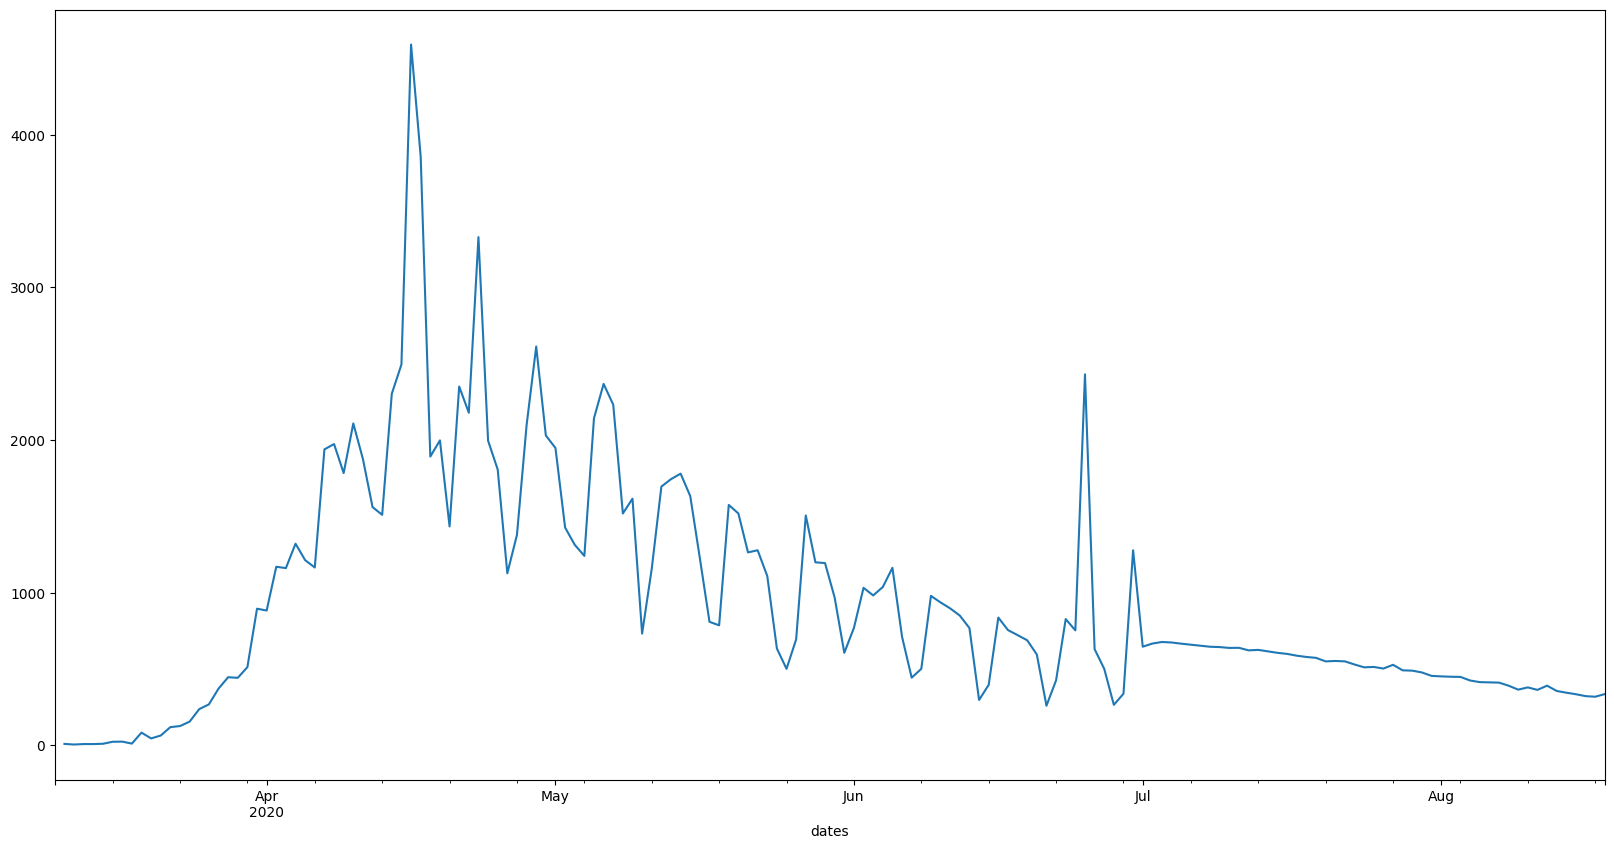

In [29]:
deaths_per_state = pd.pivot_table(death_quantiles, index='dates', values=['q.05', 'q.50', 'q.95'], columns='simple_state', aggfunc=np.sum)

deaths_per_state['q.50'].sum(axis=1).diff().plot(figsize=(20,10))